In [29]:
import json
import time

import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
import pickle
import seaborn as sns


In [17]:
sns.set()

Основная работа с функциями и ускорением была произведена в отдельных модулях и там же произведены расчеты, так как не получилось подружить numba и SALib с jupyter окружением.

# Запуск без ускорения

Результаты модуля sobol_analysis для функции multivar_func_classic

    Генерация выборки заняло 39.76 секунд

    Время выполнения функции 8.42 секунд

    Время выполнения анализа Соболева 91.57 секунд  

In [40]:
Si_df = pd.read_csv('./result_dump/basic_result.csv')
Si_df

,Unnamed: 0,ST,ST_conf,S1,S1_conf
0,first,7.385706e-01,8.692341e-01,-2.219740e-04,9.801772e-02
1,second,1.478645e-08,2.262197e-08,9.456247e-08,2.687311e-07
2,third,1.248495e+00,2.002727e+00,-4.727539e-05,2.578538e-04


/var/folders/58/stmjh7594pz97tw2s0r0kfkw0000gn/T/ipykernel_12584/1075416516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indices.rename(columns={'Unnamed: 0': 'name'}, inplace=True)


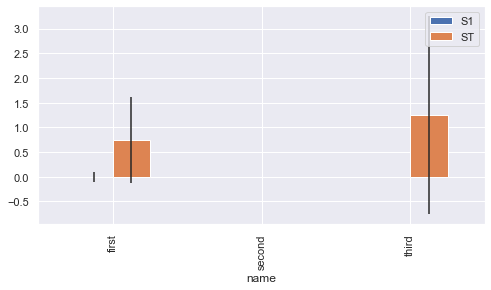

In [41]:
fig, ax = plt.subplots(1)

indices = Si_df[['Unnamed: 0', 'S1','ST']]
indices.rename(columns={'Unnamed: 0': 'name'}, inplace=True)
indices.set_index('name', inplace=True)
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,4)

plt.show()

# Ускорение с использованием numba

Результаты модуля sobol_analysis для функции multivar_func_numba

    Генерация выборки заняло 40.38 секунд

    Время выполнения функции 3.82 секунд

    Время выполнения анализа Соболева 82.99 секунд


Ускорили время выполнения в 2.5 раза примерно


# Добавление параллелилиризма

Запуск с флагом parallel_SA=True у функции sobol.analyze привел к улучшению результата, даже наоборот.

    Генерация выборки заняло 40.45 секунд

    Время выполнения функции 8.54 секунд

    Время выполнения анализа Соболева 281.28 секунд


Аналогично использование prange для попытке распараллелить цикл в модуле parallel_sobol_analysis тоже не привело к ускорению

    Время выполнения функции 8.72 секунд

Может быть не правильно запускал что-то, декоратор @numba.njit с параметрами parallel=True не завелся :(